In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
product = pd.read_csv("C:/Users/HP/Desktop/Product.csv",escapechar="|",encoding='latin-1')


In [3]:
product['flavor'] = product['flavor'].str.replace("|",";",regex=True)
product['flavor'] = product['flavor'].fillna("")
product.head()

,market_subcategory,id,eventdate,country,positioning,region,flavor
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified"
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified"
2,Juice & Juice Drinks,3,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Lemon; Honey; Ginger
3,Juice & Juice Drinks,4,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango; Passion Fruit
4,Juice & Juice Drinks,5,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango



## 1.1  Create a list of unique flavors based on your analysis. What is the total number of unique flavors in your list?


In [4]:
l = list(product['flavor'])
list_of_flavor=[]
for i in range(len(product)):
    eles= l[i].split('; ')
    for i in eles:
        list_of_flavor.append(i.lower().strip().strip(";"))
no_of_unique_flvrs= len(set(list_of_flavor))-1  #as I changed the NaN values to empty strings
print(no_of_unique_flvrs)

765


## 1.2 Plot histogram of market subcategory against eventdate (years). Do any categories show negative trend over years? 


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

In [6]:
product['EventYear'] = pd.DatetimeIndex(product['eventdate']).year

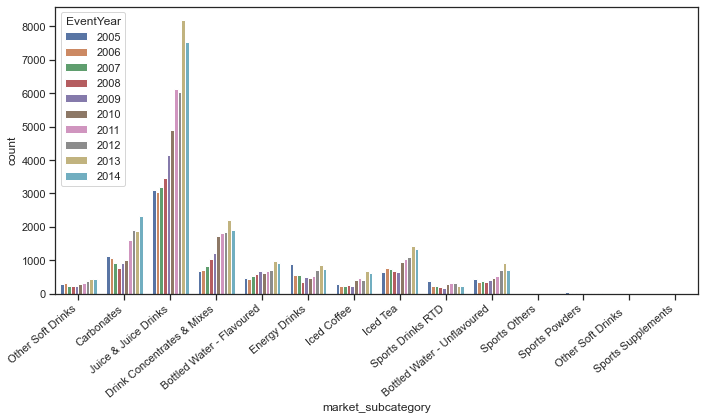

In [43]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='market_subcategory',hue='EventYear',data=product)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.tight_layout()
plt.show()

**"Sports Drinks RTD" is showing a negative trend.**



## 1.3 Which market subcategory has highest unique flavors?


In [8]:
new_df= product.groupby('market_subcategory')['flavor']

In [9]:
for key, item in new_df:
    print(new_df.get_group(key), "\n\n" )

8             Cherry, Not specified; Vanilla, Not specified
36        Grapefruit, not specified; Lemon; Orange, not ...
53                          Strawberry; Mint, not specified
54                                        Fennel; Coriander
55                                 Rose; Superfruit, Lychee
                                ...                        
114664                              Mango; Peach; Pineapple
114665                     Strawberry; Fruit, Not Specified
114666                                            Lime, Key
114667                                            Tangerine
114683           Berry, Cranberry; Raspberry, Not Specified
Name: flavor, Length: 6636, dtype: object 


59        Unflavored
69        Unflavored
81        Unflavored
102       Unflavored
104       Unflavored
             ...    
114614    Unflavored
114617    Unflavored
114631    Unflavored
114634    Unflavored
114647    Unflavored
Name: flavor, Length: 5296, dtype: object 


1                  

In [10]:
def unq(x):
    all=set()
    for i in x:
        eles = i.split('; ')
        for ele in eles:
            all.add(ele.lower().strip().strip(";"))
    return len(all)
  #return len(set(all))
df2 = product.groupby('market_subcategory')['flavor'].apply(lambda x:unq(list(x))).reset_index(level=0)


In [11]:
df2

,market_subcategory,flavor
0,Bottled Water - Flavoured,320
1,Bottled Water - Unflavoured,13
2,Carbonates,328
3,Drink Concentrates & Mixes,499
4,Energy Drinks,234
5,Iced Coffee,159
6,Iced Tea,300
7,Juice & Juice Drinks,503
8,Other Soft Drinks,325
9,Other Soft Drinks,2


In [12]:
df2['market_subcategory'].iloc[df2['flavor'].argmax()]

'Juice & Juice Drinks'

## 2.1 some insights on the number of product launches over different quarters for “fruit” Flavor 

In [13]:
flavor = pd.read_csv('C:/Users/HP/Desktop/Flavor Classification Dataset.csv',encoding='latin-1')

In [14]:
flavor.head()

,Flavor_Group,flavor
0,Alcohol,"Vodka, Citron"
1,Alcohol,Bacardi
2,Alcohol,"Bacardi, Gold"
3,Alcohol,"Bacardi, Silver"
4,Alcohol,"Beer, Ale"


In [15]:
list_of_fruit_flavors = list(flavor[flavor['Flavor_Group']=='Fruit']['flavor'])

In [16]:
list_of_fruit_flavors = [each_string.lower() for each_string in list_of_fruit_flavors]
list_of_fruit_flavors

['abiu',
 'akee',
 'alibertia',
 'aloe vera',
 'apple, golden',
 'apple, granny smith',
 'apple, green',
 'apple, not specified',
 'apple, red',
 'apricot',
 'araza',
 'bael fruit',
 'banana',
 'barbados cherry',
 'bayberry',
 'bayberry, red',
 'bergamot',
 'berry, aronia (chokeberry)',
 'berry, barberry',
 'berry, bearberry',
 'berry, blackberry',
 'berry, blueberry',
 'berry, boysenberry',
 'berry, buffalo',
 'berry, cranberry',
 'berry, crowberry',
 'berry, elderberry',
 'berry, gooseberry',
 'berry, hackberry',
 'berry, lingon',
 'berry, marion',
 'berry, miracle',
 'berry, mixed',
 'berry, moringa',
 'berry, nannyberry',
 'berry, not specified',
 'berry, red',
 'berry, salmonberry',
 'berry, strawberry tree',
 'berry, ugniberry',
 'berry, wildberry',
 'berry, wineberry',
 'bignay',
 'bilberry',
 'biriba',
 'black sapote',
 'blackcurrant',
 'bluecurrant',
 'brambleberry',
 'cannonball',
 'canteloupe',
 'cassis',
 'ceylon gooseberry',
 'champedak',
 'cherry apple',
 'cherry, beach',

In [17]:
product['eventdate'] =product['eventdate'].apply(lambda x:pd.to_datetime(x))


In [18]:
product['Event_quarter'] = product['eventdate'].apply(lambda x:(x.year,x.quarter))

In [19]:
product.head()

,market_subcategory,id,eventdate,country,positioning,region,flavor,EventYear,Event_quarter
0,Other Soft Drinks,1,2005-01-01,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified",2005,"(2005, 1)"
1,Carbonates,2,2005-01-01,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified",2005,"(2005, 1)"
2,Juice & Juice Drinks,3,2005-01-01,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Lemon; Honey; Ginger,2005,"(2005, 1)"
3,Juice & Juice Drinks,4,2005-01-01,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango; Passion Fruit,2005,"(2005, 1)"
4,Juice & Juice Drinks,5,2005-01-01,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango,2005,"(2005, 1)"


In [20]:
def count_of_fruit_flavor(x):
    count = 0
    for i in x:
        flvrs = i.split("; ")
        for flvr in flvrs:
            if flvr.lower().strip().strip(";") in list_of_fruit_flavors:
                count += 1
    return count


In [21]:
new_df = product.groupby('Event_quarter')['flavor']

In [22]:
for key, item in new_df:
    print(new_df.get_group(key), "\n\n" )

0         Herbs, not specified; Fruit, not specified
1                               Fruit, not specified
2                               Lemon; Honey; Ginger
3                               Mango; Passion Fruit
4                                              Mango
                             ...                    
75770                              Tea, Black; Peach
75771                                          Mango
75772                                           Kiwi
102384                              Berry, Cranberry
107862                        Lime; Berry, Cranberry
Name: flavor, Length: 8413, dtype: object 


910                   Cherry, not specified; Lime
1192                                             
1929                                 Honey; Lemon
2326                             Grape, red; Lime
2851     Exotic Fruit, not specified; Nut, cashew
3123               Apple, red; Strawberry; Banana
3125            Melon, not specified; Lemon; Thai
3136                  

In [23]:
new_df = new_df.apply(lambda x:count_of_fruit_flavor(list(x))).reset_index()

In [24]:
new_df

,Event_quarter,flavor
0,"(2005, 1)",8214
1,"(2005, 2)",16
2,"(2005, 3)",12
3,"(2005, 4)",5
4,"(2006, 1)",7954
5,"(2007, 1)",7238
6,"(2008, 1)",8840
7,"(2009, 1)",9732
8,"(2010, 1)",11569
9,"(2010, 2)",3


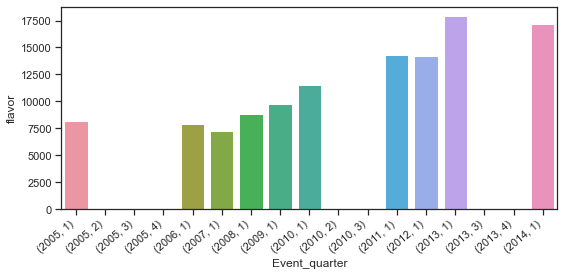

In [25]:
plt.figure(figsize = (8,4))
ax = sns.barplot(x='Event_quarter',y='flavor',data=new_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.tight_layout()
plt.show()

**3.some insights on the distribution for “Convenience” & “Ethical Positioning”
    Groups**

In [26]:
p_group = pd.read_csv('C:/Users/HP/Desktop/Positioning Category Mapping Dataset.csv',encoding='latin-1')

In [27]:
p_group.head()

,Positioning Group,Positioning Subcategory
0,Age,Children (5-12 years)
1,Age,Seniors (55+)
2,Others,Economy
3,Choice,Halal
4,Choice,Kosher


In [28]:
print(set(list(p_group['Positioning Group'])))

{'Age', 'Convenience', 'Convenience \x96 Packaging', 'Price Positioning', 'Ethical', 'Health (Active)', 'Gender', 'Juice', 'Choice', 'Co-Branding', 'Pleasure', 'Health (Passive)', 'Convenience \x96 Preparation', 'Others', 'Supplements', 'Seasonal/In-Out Products'}


In [29]:
p_conv = list(p_group[p_group['Positioning Group']=='Convenience']['Positioning Subcategory'])
p_ethc = list(p_group[p_group['Positioning Group']=='Ethical']['Positioning Subcategory'])

In [30]:
p_conv

['Convenience - Consumption',
 'Convenience - Easy-to-Prepare',
 'Convenience - Packaging',
 'Convenience - Ready Prepared',
 'Convenience - Time Saving']

In [31]:
p_ethc

['Ethical - Animal/Fish & Bird',
 'Ethical - Environment',
 'Ethical - Human',
 'Ethical - Not Specific',
 'Ethical - Packaging']

In [32]:
c = 0
e = 0
def Count(x):
    global c,e
    if type(x) == float:
        pass
    else:
        eles = x.split(", ")
        for ele in eles:
            if ele in p_conv:
                c += 1
                break
            elif ele in p_ethc:
                e += 1
                break

In [33]:
product['positioning'].apply(lambda x:Count(x))
print('Products with Convenience positioning :',c,'\n','Products with Ethical positioning :',e)

Products with Convenience positioning : 70286 
 Products with Ethical positioning : 13320


In [34]:
product.head()

,market_subcategory,id,eventdate,country,positioning,region,flavor,EventYear,Event_quarter
0,Other Soft Drinks,1,2005-01-01,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified",2005,"(2005, 1)"
1,Carbonates,2,2005-01-01,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified",2005,"(2005, 1)"
2,Juice & Juice Drinks,3,2005-01-01,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Lemon; Honey; Ginger,2005,"(2005, 1)"
3,Juice & Juice Drinks,4,2005-01-01,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango; Passion Fruit,2005,"(2005, 1)"
4,Juice & Juice Drinks,5,2005-01-01,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango,2005,"(2005, 1)"


In [35]:
c_product = product[(product['market_subcategory']=='Energy Drinks') & (product['country']=='Canada') & (product['EventYear']==2013)]

In [36]:
c_product.head()

,market_subcategory,id,eventdate,country,positioning,region,flavor,EventYear,Event_quarter
76347,Energy Drinks,76348,2013-01-06,Canada,"Sugar Free, Energy/Alertness, Convenience - Co...",North America,"Lemonade, Pink",2013,"(2013, 1)"
76371,Energy Drinks,76372,2013-01-08,Canada,"Energy/Alertness, Convenience - Consumption",North America,"Berry, Mixed",2013,"(2013, 1)"
76372,Energy Drinks,76373,2013-01-08,Canada,"Energy/Alertness, Convenience - Consumption",North America,Unflavored,2013,"(2013, 1)"
76373,Energy Drinks,76374,2013-01-08,Canada,"Sugar Free, Energy/Alertness, Convenience - Co...",North America,Unflavored,2013,"(2013, 1)"
76374,Energy Drinks,76375,2013-01-08,Canada,"Energy/Alertness, Convenience - Consumption",North America,"Cherry, Not Specified",2013,"(2013, 1)"


In [37]:
def eth_pack(x):
    y = False
    if type(x)==float:
        return y
    else:
        x = x.split(', ')
        for i in x:
            if i =='Ethical - Packaging':
                y = True
        return y
c_product=c_product[(c_product['positioning'].apply(lambda x:eth_pack(x)))]  
c_product

,market_subcategory,id,eventdate,country,positioning,region,flavor,EventYear,Event_quarter
82404,Energy Drinks,82405,2013-01-11,Canada,"Organic, Energy/Alertness, Ethical - Human, Et...",North America,"Berry, Not specified; Tea, Green; Tea, Mate",2013,"(2013, 1)"
82405,Energy Drinks,82406,2013-01-11,Canada,"Brain Health, Energy/Alertness, Ethical - Pack...",North America,"Citrus, Not Specified",2013,"(2013, 1)"
82439,Energy Drinks,82440,2013-01-11,Canada,"Brain Health, Energy/Alertness, Ethical - Pack...",North America,"Cherry, Not Specified",2013,"(2013, 1)"
82440,Energy Drinks,82441,2013-01-11,Canada,"Brain Health, Energy/Alertness, Ethical - Pack...",North America,"Berry, Mixed",2013,"(2013, 1)"


In [38]:
from collections import Counter
def unq2(x):
    flavors=[]
    for i in x:
        eles = i.split('; ')
        for ele in eles:
            flavors.append(ele.lower().strip().strip(";"))
    return flavors
def top5(x):
    return Counter(x).most_common(5)
product_2 = product[product['EventYear']==2013].groupby('country')['flavor'].apply(lambda x:unq2(x)).reset_index()
product_2['Top_5'] = product_2['flavor'].apply(lambda x:top5(x))
product_2.head()

,country,flavor,Top_5
0,Albania,"[unflavored, apple, red, banana, apricot, oran...","[(unflavored, 8), (apple, red, 3), (banana, 2)..."
1,Algeria,"[orange, not specified, carrot, orange, not sp...","[(orange, not specified, 9), (apple, red, 4), ..."
2,Angola,"[orange, not specified, cola]","[(orange, not specified, 1), (cola, 1)]"
3,Argentina,"[lemonade, banana, apple, red, apple, red, ora...","[(orange, not specified, 55), (lemon, 30), (ap..."
4,Australia,"[lemon, orange, not specified, orange, not spe...","[(apple, red, 61), (orange, not specified, 33)..."


In [39]:
def unqft(x):
    flavors=[]
    for i in x:
        if type(i)==float:
            continue
        eles=i.split(', ')
        for ele in eles:
            try:
                k = p_group[p_group['Positioning Subcategory'] == ele]['Positioning Group'].iloc[0]
                flavors.append(k)
            except:
                k = 0
    return flavors
def top5(x):
    return Counter(x).most_common(5)
df3 = product[product['EventYear']==2013].groupby('country')['positioning'].apply(lambda x:unqft(x)).reset_index()
df3['Top_5'] = df3['positioning'].apply(lambda x:top5(x))
df3

,country,positioning,Top_5
0,Albania,"[Health (Passive), Juice, Convenience, Juice, ...","[(Convenience, 11), (Health (Passive), 8), (He..."
1,Algeria,"[Health (Passive), Ethical, Health (Passive), ...","[(Health (Passive), 19), (Convenience, 17), (E..."
2,Angola,[Convenience],"[(Convenience, 1)]"
3,Argentina,"[Convenience, Health (Passive), Health (Active...","[(Health (Passive), 278), (Convenience, 158), ..."
4,Australia,"[Convenience, Ethical, Health (Passive), Healt...","[(Health (Passive), 501), (Convenience, 180), ..."
...,...,...,...
84,United Arab Emirates,"[Others, Convenience, Others, Convenience, Oth...","[(Convenience, 38), (Health (Passive), 37), (E..."
85,United Kingdom,"[Juice, Health (Passive), Ethical, Health (Pas...","[(Health (Passive), 1373), (Convenience, 732),..."
86,United States,"[Health (Active), Convenience, Ethical, Health...","[(Health (Passive), 4975), (Convenience, 2050)..."
87,Uruguay,[],[]
